In [67]:
import numpy as np
import matplotlib.pyplot as plt

# H2

In [68]:
# Define Pauli matrices
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])

# Define the Hamiltonian as a sum of Kronecker products
H = (-1.0523 * np.kron(I, I) +
     0.3979 * np.kron(I, Z) - 
     0.3979 * np.kron(Z, I) - 
     0.0112 * np.kron(Z, Z) + 
     0.1809 * np.kron(X, X))

# Compute diagonal elements and row sums for Gershgorin disks
diagonal_elements = np.diag(H)
radii = np.sum(np.abs(H), axis=1) - np.abs(diagonal_elements)

# Compute Gershgorin disk centers and radii
gershgorin_disks = [(i, diagonal_elements[i], radii[i]) for i in range(H.shape[0])]

# Sort disks by their lower bound
gershgorin_disks.sort(key=lambda d: d[1] - d[2])  # Sort by (center - radius)

# Function to check if two disks overlap
def disks_overlap(d1, d2):
    center1, radius1 = d1[1], d1[2]
    center2, radius2 = d2[1], d2[2]
    return abs(center1 - center2) <= (radius1 + radius2)

# Store selected disks
selected_indices = set()
selected_disks = []

for i in range(len(gershgorin_disks)):
    if gershgorin_disks[i][0] in selected_indices:
        continue
    
    # Select the next lowest Gershgorin disk
    current_disk = gershgorin_disks[i]
    selected_indices.add(current_disk[0])
    selected_disks.append(current_disk)

    # Collect all disks overlapping with this one
    for j in range(len(gershgorin_disks)):
        if gershgorin_disks[j][0] in selected_indices:
            continue
        if disks_overlap(current_disk, gershgorin_disks[j]):
            selected_indices.add(gershgorin_disks[j][0])
            selected_disks.append(gershgorin_disks[j])

# Print results with corresponding Hamiltonian row and disk index
for (i, center, radius) in selected_disks:
    hamiltonian_row = H[i]  # Extract the row of H corresponding to this disk
    binary_representation = format(i, f"0{int(np.log2(H.shape[0]))}b")  # Convert index to binary
    print(f"Disk {i+1} (Row {i}): Center = {center:.4f}, Radius = {radius:.4f}, Range = [{center - radius:.4f}, {center + radius:.4f}]")
    print(f"  Corresponding Hamiltonian Row (Index {i}): {hamiltonian_row}")
    print(f"  Computational Basis State (Binary): |{binary_representation}>")
    print()

Disk 2 (Row 1): Center = -1.8369, Radius = 0.1809, Range = [-2.0178, -1.6560]
  Corresponding Hamiltonian Row (Index 1): [ 0.     -1.8369  0.1809  0.    ]
  Computational Basis State (Binary): |01>

Disk 1 (Row 0): Center = -1.0635, Radius = 0.1809, Range = [-1.2444, -0.8826]
  Corresponding Hamiltonian Row (Index 0): [-1.0635  0.      0.      0.1809]
  Computational Basis State (Binary): |00>

Disk 4 (Row 3): Center = -1.0635, Radius = 0.1809, Range = [-1.2444, -0.8826]
  Corresponding Hamiltonian Row (Index 3): [ 0.1809  0.      0.     -1.0635]
  Computational Basis State (Binary): |11>

Disk 3 (Row 2): Center = -0.2453, Radius = 0.1809, Range = [-0.4262, -0.0644]
  Corresponding Hamiltonian Row (Index 2): [ 0.      0.1809 -0.2453  0.    ]
  Computational Basis State (Binary): |10>



C:\Users\feder\AppData\Local\Temp\ipykernel_16752\4090203125.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((center, 0), radius, color='blue', alpha=0.1, edgecolor='black', linewidth=1.5)


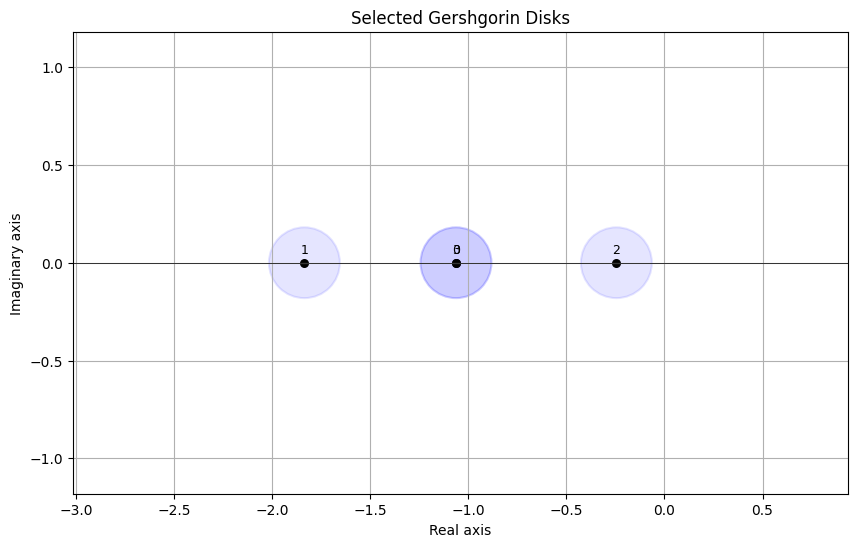

In [69]:
# Plot the selected Gershgorin disks
fig, ax = plt.subplots(figsize=(10, 6))

for index, center, radius in selected_disks:
    circle = plt.Circle((center, 0), radius, color='blue', alpha=0.1, edgecolor='black', linewidth=1.5)
    ax.add_patch(circle)
    plt.scatter(center, 0, color='black', marker='o', s=30)  # Mark the center
    plt.text(center, 0.05, f"{index}", ha='center', fontsize=9, color='black')  # Label each disk

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal axis
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.title("Selected Gershgorin Disks")
plt.xlim(min(diagonal_elements - radii) - 1, max(diagonal_elements + radii) + 1)
plt.ylim(-max(radii) - 1, max(radii) + 1)
plt.grid(True)

plt.show()

# H20

In [70]:
# Compute diagonal elements and row sums for Gershgorin disks
diagonal_elements = np.diag(H)
radii = np.sum(np.abs(H), axis=1) - np.abs(diagonal_elements)

# Compute Gershgorin disk centers and radii
gershgorin_disks = [(diagonal_elements[i], radii[i]) for i in range(H.shape[0])]

# Sort the eigenvalues of the Hamiltonian and find the lowest 5
eigenvalues, eigenvectors = np.linalg.eig(H)
sorted_indices = np.argsort(eigenvalues)
lowest_eigenvalues = eigenvalues[sorted_indices[:5]]

print(lowest_eigenvalues)

[-1.85720199 -1.2444     -0.8826     -0.22499801]


In [71]:
I = np.array([[1, 0], [0, 1]])  # Identity matrix
X = np.array([[0, 1], [1, 0]])  # Pauli-X matrix
Y = np.array([[0, -1j], [1j, 0]])  # Pauli-Y matrix
Z = np.array([[1, 0], [0, -1]])  # Pauli-Z matrix

# Define the Hamiltonian terms using Kronecker product (np.kron)
H1 = -12.533 * np.kron(np.kron(np.kron(np.kron(np.kron(I, I), I), I), I), I)
H2 = -1.276 * np.kron(np.kron(np.kron(np.kron(np.kron(Z, I), I), Z), I), I)
H3 = 0.627 * np.kron(np.kron(np.kron(np.kron(np.kron(Z, Z), I), I), I), I)
H4 = -0.875 * np.kron(np.kron(np.kron(np.kron(np.kron(I, Z), I), I), Z), I)
H5 = 0.452 * np.kron(np.kron(np.kron(np.kron(np.kron(I, I), Z), Z), I), I)
H6 = 0.182 * np.kron(np.kron(np.kron(np.kron(np.kron(X, I), X), I), I), I)
H7 = 0.139 * np.kron(np.kron(np.kron(np.kron(np.kron(I, X), I), X), I), I)
H8 = -0.047 * np.kron(np.kron(np.kron(np.kron(np.kron(Y, Y), I), I), I), I)
H9 = 0.209 * np.kron(np.kron(np.kron(np.kron(np.kron(Z, I), Z), I), Z), I)
H10 = -0.154 * np.kron(np.kron(np.kron(np.kron(np.kron(Z, Z), Z), Z), I), I)
H11 = 0.198 * np.kron(np.kron(np.kron(np.kron(np.kron(I, Z), I), Z), Z), Z)
H12 = 0.061 * np.kron(np.kron(np.kron(np.kron(np.kron(X, I), I), X), I), I)
H13 = -0.027 * np.kron(np.kron(np.kron(np.kron(np.kron(I, I), Y), I), Y), I)
H14 = 0.118 * np.kron(np.kron(np.kron(np.kron(np.kron(Z, I), Z), Z), I), Z)

# Sum all Hamiltonian terms
H = H1 + H2 + H3 + H4 + H5 + H6 + H7 + H8 + H9 + H10 + H11 + H12 + H13 + H14

# Compute diagonal elements and row sums for Gershgorin disks
diagonal_elements = np.diag(H)
radii = np.sum(np.abs(H), axis=1) - np.abs(diagonal_elements)

# Compute Gershgorin disk centers and radii
gershgorin_disks = [(i, diagonal_elements[i], radii[i]) for i in range(H.shape[0])]

# Sort disks by their lower bound
gershgorin_disks.sort(key=lambda d: d[1] - d[2])  # Sort by (center - radius)

# Function to check if two disks overlap
def disks_overlap(d1, d2):
    center1, radius1 = d1[1], d1[2]
    center2, radius2 = d2[1], d2[2]
    return abs(center1 - center2) <= (radius1 + radius2)

# Store selected disks
selected_indices = set()
selected_disks = []

# Find the lowest 5 Gershgorin disks and collect all overlapping ones
for i in range(len(gershgorin_disks)):
    if gershgorin_disks[i][0] in selected_indices:
        continue
    
    # Select the next lowest Gershgorin disk
    current_disk = gershgorin_disks[i]
    selected_indices.add(current_disk[0])
    selected_disks.append(current_disk)  # Store the corresponding Hamiltonian row

   # Collect all disks overlapping with this one
    for j in range(len(gershgorin_disks)):
        if gershgorin_disks[j][0] in selected_indices:
            continue
        if disks_overlap(current_disk, gershgorin_disks[j]):
            selected_indices.add(gershgorin_disks[j][0])
            selected_disks.append(gershgorin_disks[j])

    # Stop when we have at least 5 main disks considered
    if len(selected_disks) >= 5:
        break
# Print results with corresponding Hamiltonian row and disk index
for (i, center, radius) in selected_disks:
    hamiltonian_row = H[i]  # Extract the row of H corresponding to this disk
    binary_representation = format(i, f"0{int(np.log2(H.shape[0]))}b")  # Convert index to binary
    print(f"Disk {i+1} (Row {i}): Center = {center:.4f}, Radius = {radius:.4f}, Range = [{center - radius:.4f}, {center + radius:.4f}]")
    print(f"  Corresponding Hamiltonian Row (Index {i}): {hamiltonian_row}")
    print(f"  Computational Basis State (Binary): |{binary_representation}>")
    print()

Disk 37 (Row 36): Center = -16.2060+0.0000j, Radius = 0.4560, Range = [-16.6620+0.0000j, -15.7500+0.0000j]
  Corresponding Hamiltonian Row (Index 36): [  0.061+0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.182+0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j  -0.047+0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
 -16.206+0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.027+0.j   0.   +0.j
   0.139+0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j
   0.   +0.j   0.   +0.j   0.   +0.j   0.   +0.j]
  Computational Basis State (Binary): |100100>

Disk 38 (Row 37): Cen

C:\Users\feder\AppData\Local\Temp\ipykernel_16752\2984132466.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((center, 0), radius, color='blue', alpha=0.1, edgecolor='black', linewidth=1.5)


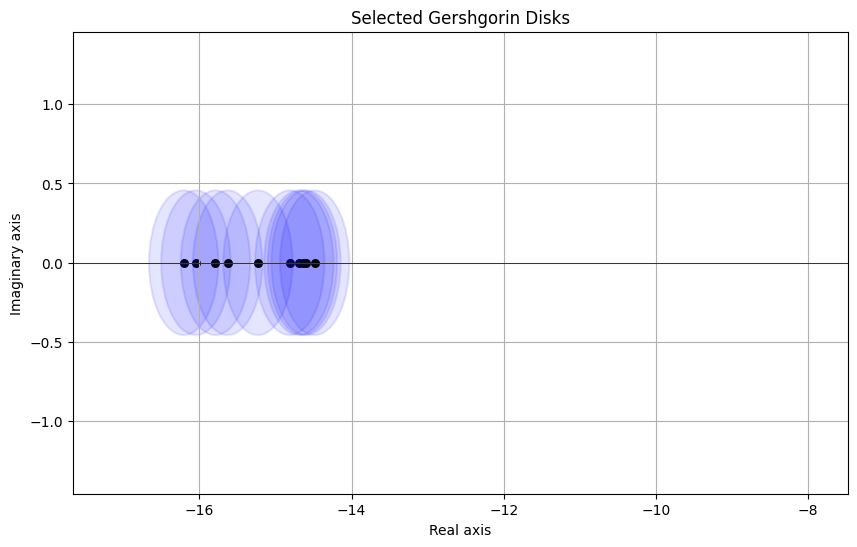

In [72]:
# Plot the selected Gershgorin disks
fig, ax = plt.subplots(figsize=(10, 6))

for index, center, radius in selected_disks:
    circle = plt.Circle((center, 0), radius, color='blue', alpha=0.1, edgecolor='black', linewidth=1.5)
    ax.add_patch(circle)
    plt.scatter(center, 0, color='black', marker='o', s=30)  # Mark the center
    plt.text(center, 0.05, " ", ha='center', fontsize=9, color='black')  # Label each disk

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal axis
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.title("Selected Gershgorin Disks")
plt.xlim(min(diagonal_elements - radii) - 1, max(diagonal_elements + radii) + 1)
plt.ylim(-max(radii) - 1, max(radii) + 1)
plt.grid(True)

plt.show()
